In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Model + Data Loading

In [2]:
import pprint

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pathlib import Path

from language_structure import *
from train import load, load_dataloader
from model import *
from utils import *
from bert import tokenization

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_file = './uncased_L-12_H-768_A-12/vocab.txt'
tokenizer = tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=True)
pp = pprint.PrettyPrinter(indent=4)
ID = "JUNE26-UPDATED-6LAYER"

# IMDB

Total Time: 849.8855 
Train Time: 269.6954
Max (Validation, Train): (0.87, 0.91)


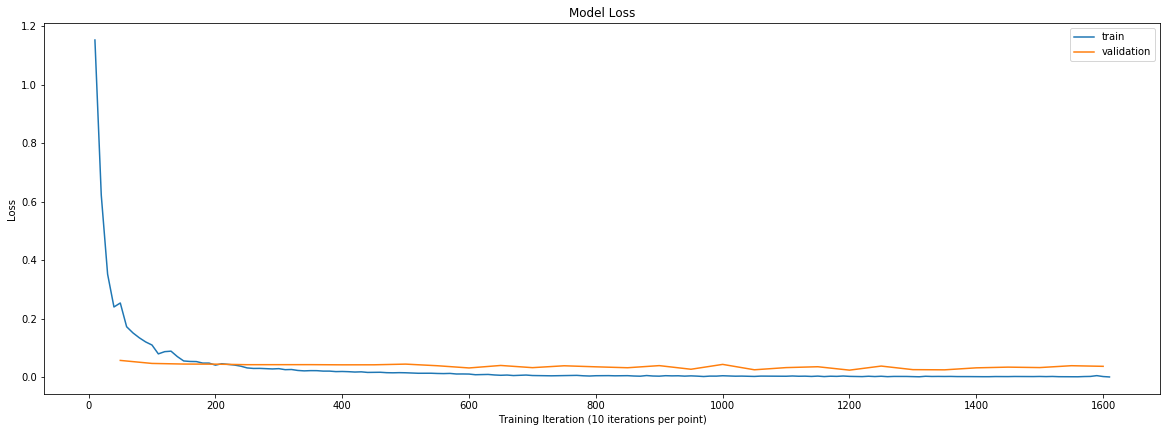

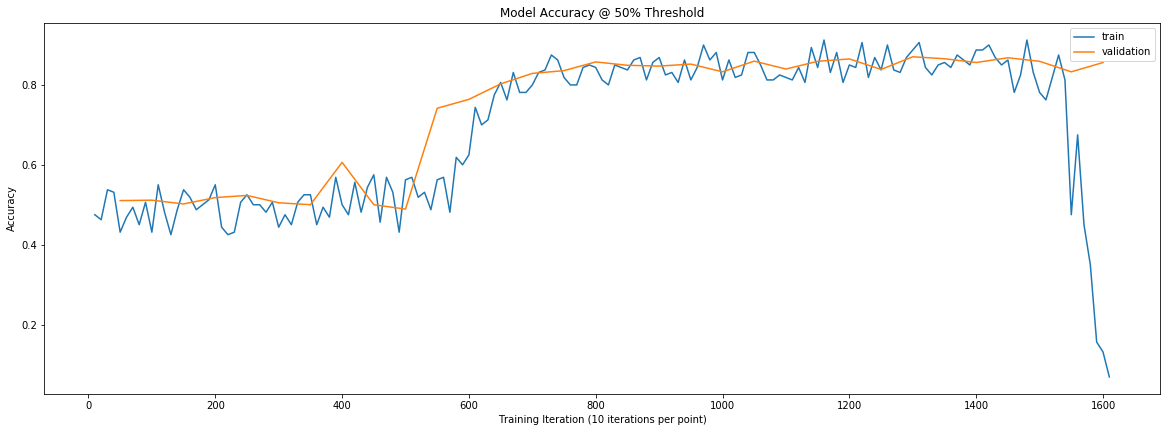

{   '--COLA': False,
    '--IMDB': True,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.3',
    '--dset-size': '0',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '2000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '50'}


In [3]:
model_path = 'complete_IMDB-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 968.5294 
Train Time: 372.3196
Max (Validation, Train): (0.88, 0.92)


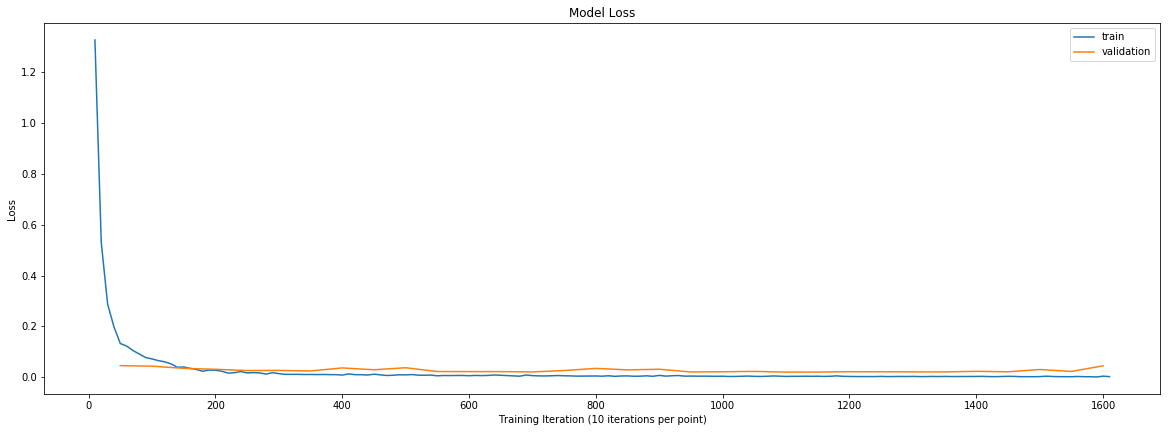

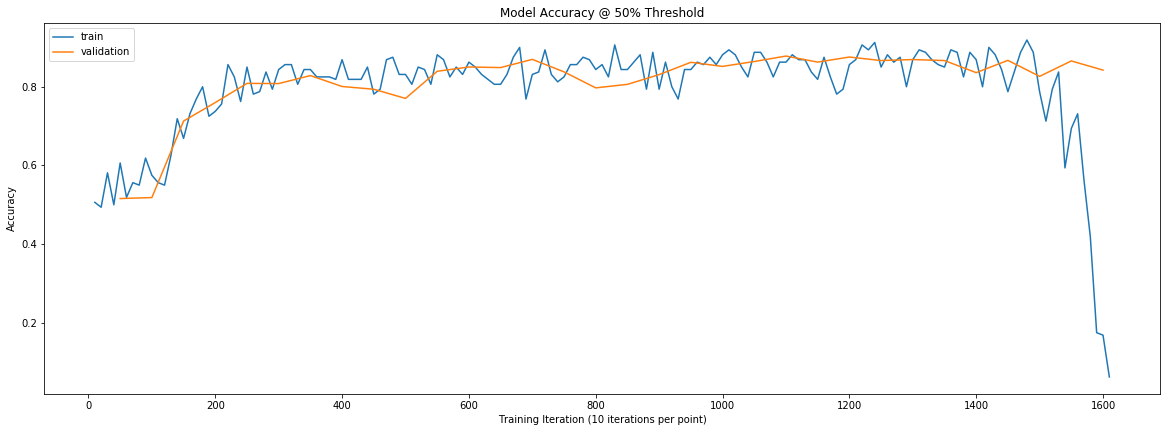

{   '--COLA': False,
    '--IMDB': True,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.3',
    '--dset-size': '0',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '2000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '50'}


In [4]:
model_path = 'complete_IMDB-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.87, 0.91)
Total Time: 849.8855 
Train Time: 269.6954
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.88, 0.92)
Total Time: 968.5294 
Train Time: 372.3196


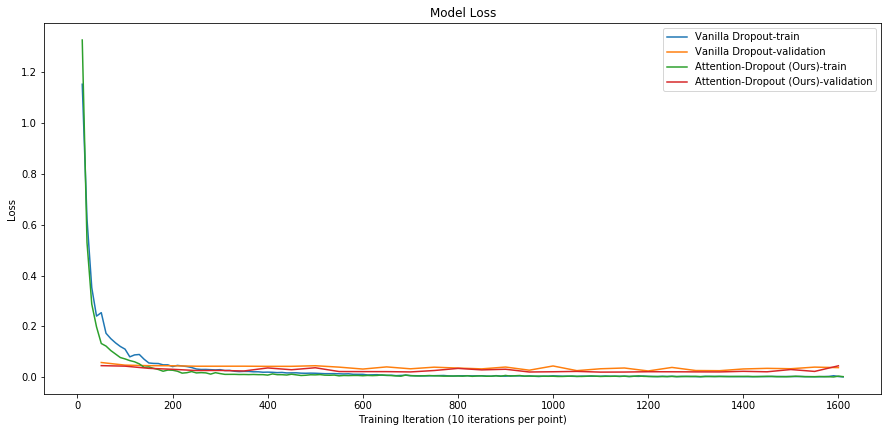

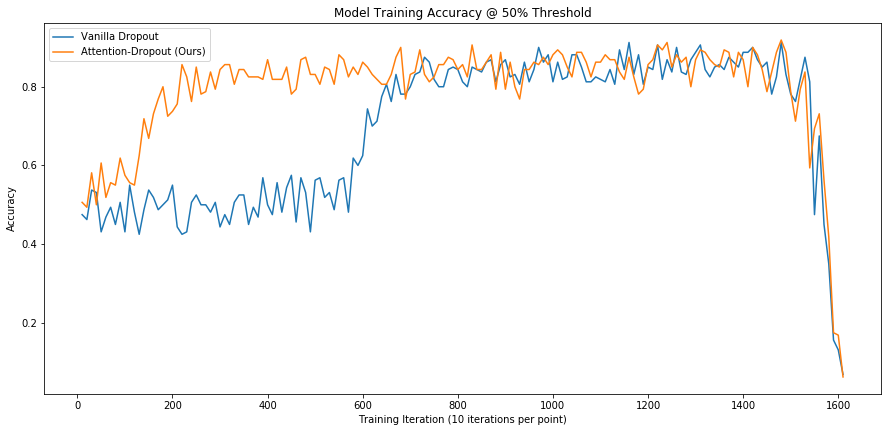

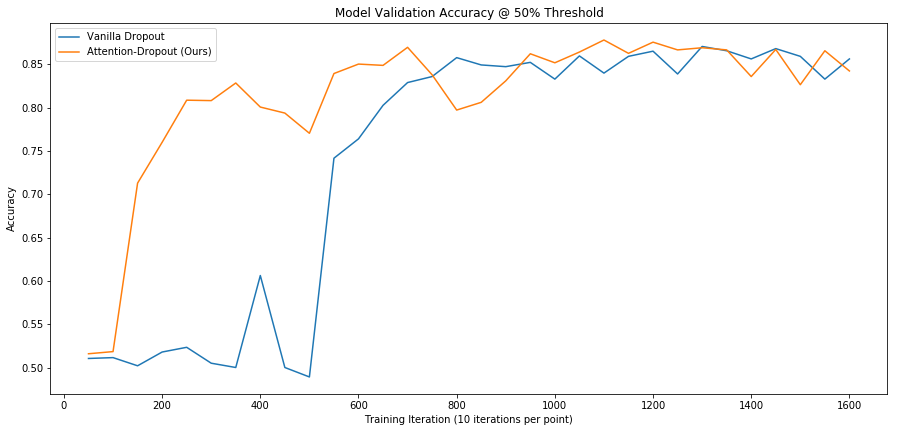

In [5]:
# converges 400 iterations sooner
compare_metrics([m1, m2], first_n=None)

# COLA

Total Time: 190.3546 
Train Time: 153.0262
Max (Validation, Train): (0.70, 0.75)


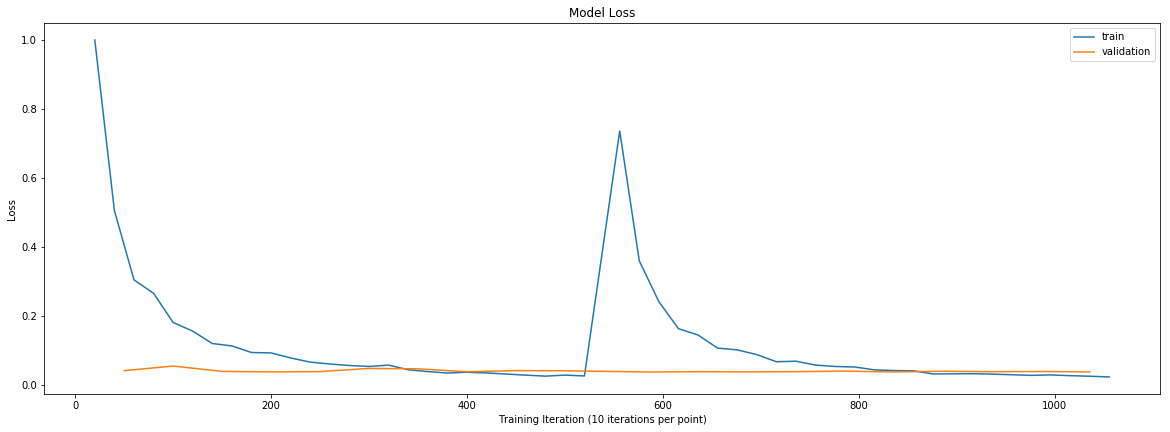

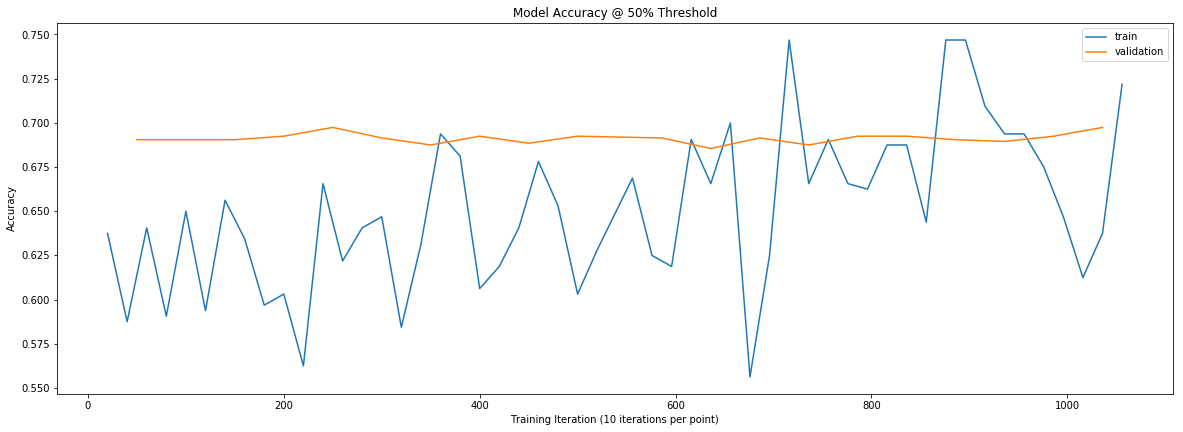

{   '--COLA': True,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.4',
    '--dset-size': '0',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '20',
    '--lr': '3e-5',
    '--max-epoch': '2',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '50'}


In [15]:
model_path = 'complete_COLA-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 224.9784 
Train Time: 187.8667
Max (Validation, Train): (0.69, 0.73)


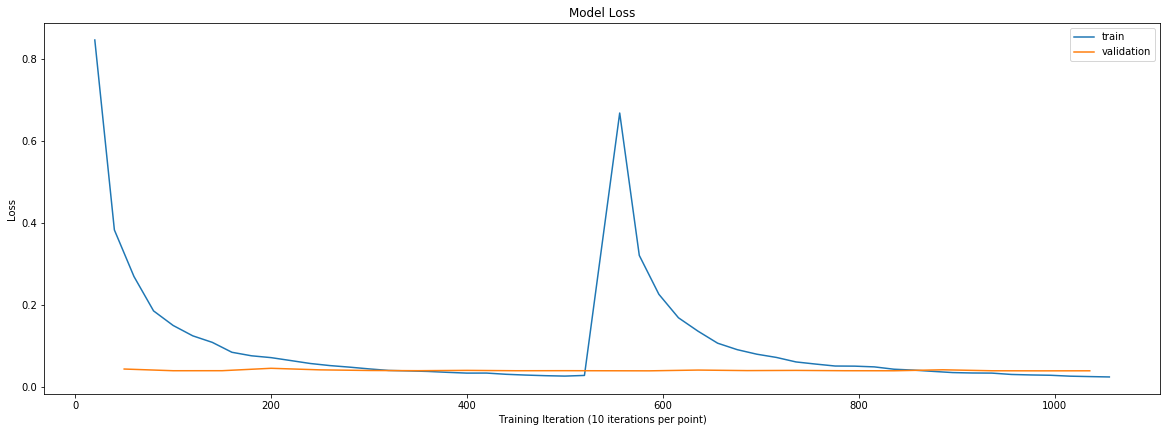

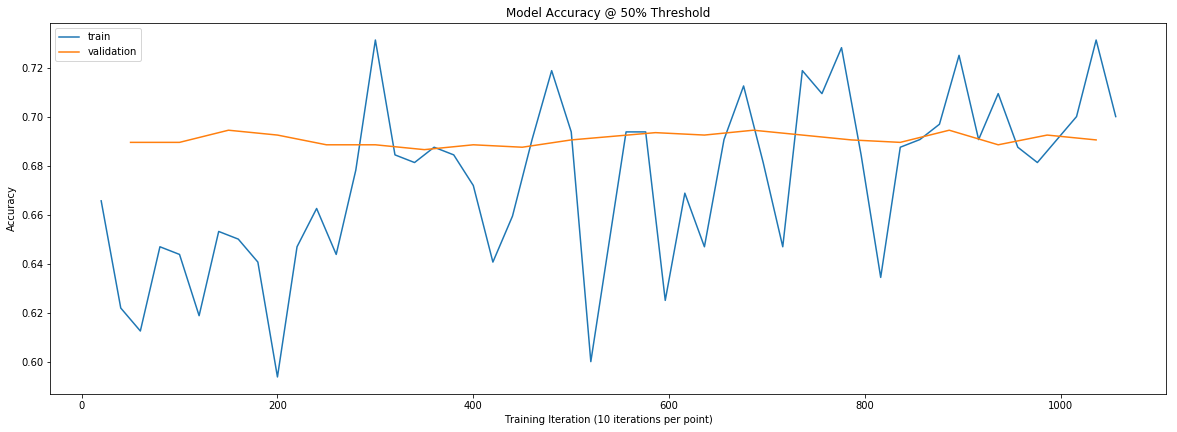

{   '--COLA': True,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.4',
    '--dset-size': '0',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '20',
    '--lr': '3e-5',
    '--max-epoch': '2',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '50'}


In [16]:
model_path = 'complete_COLA-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.70, 0.75)
Total Time: 190.3546 
Train Time: 153.0262
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.69, 0.73)
Total Time: 224.9784 
Train Time: 187.8667


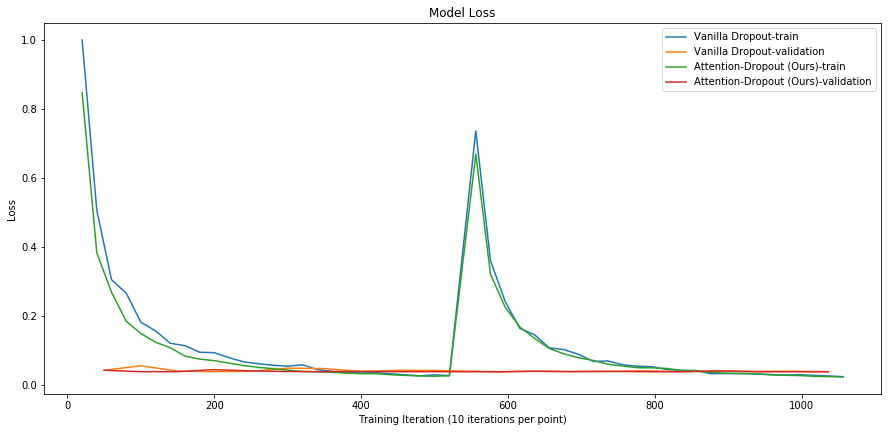

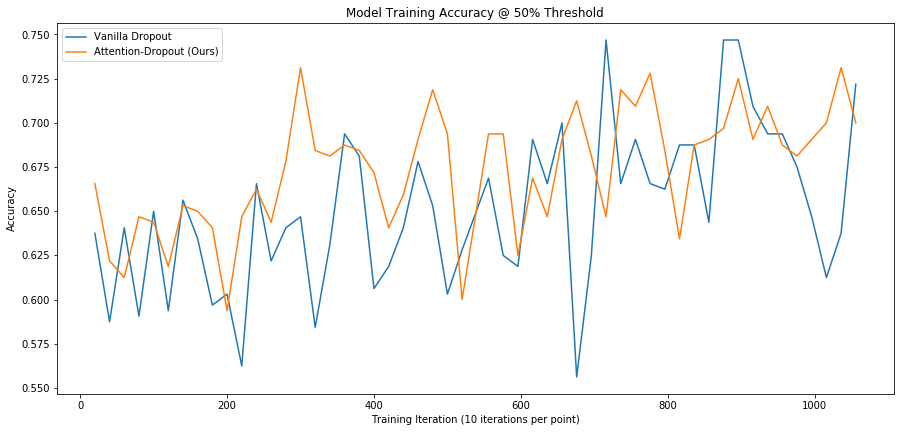

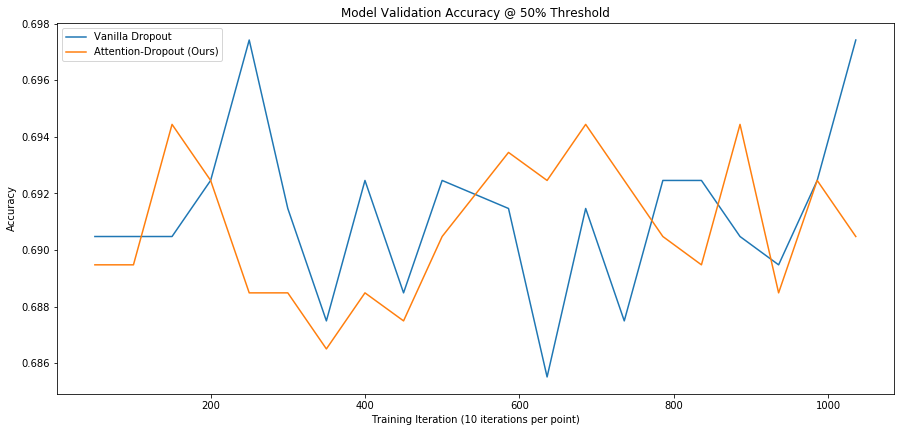

In [17]:
compare_metrics([m1, m2], first_n=None)

# QNLI

Total Time: 800.0362 
Train Time: 380.3715
Max (Validation, Train): (0.52, 0.61)


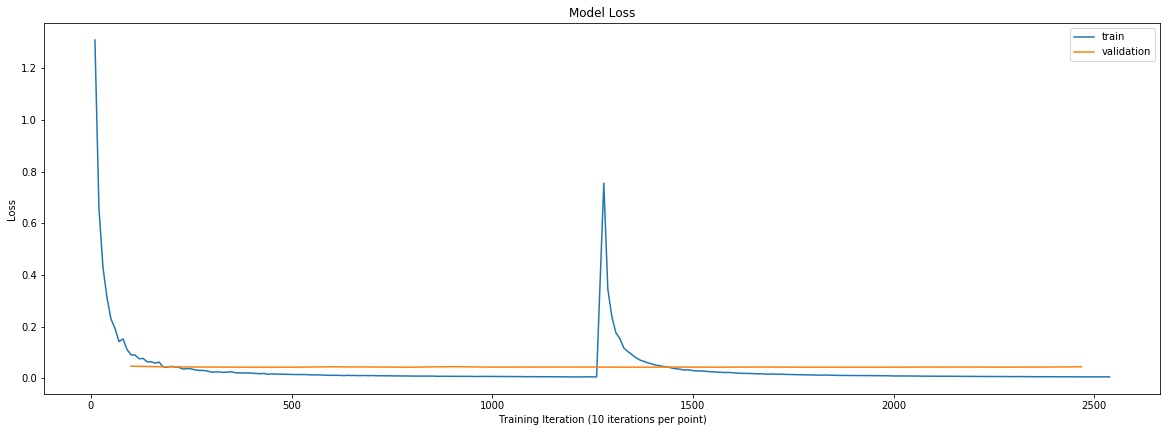

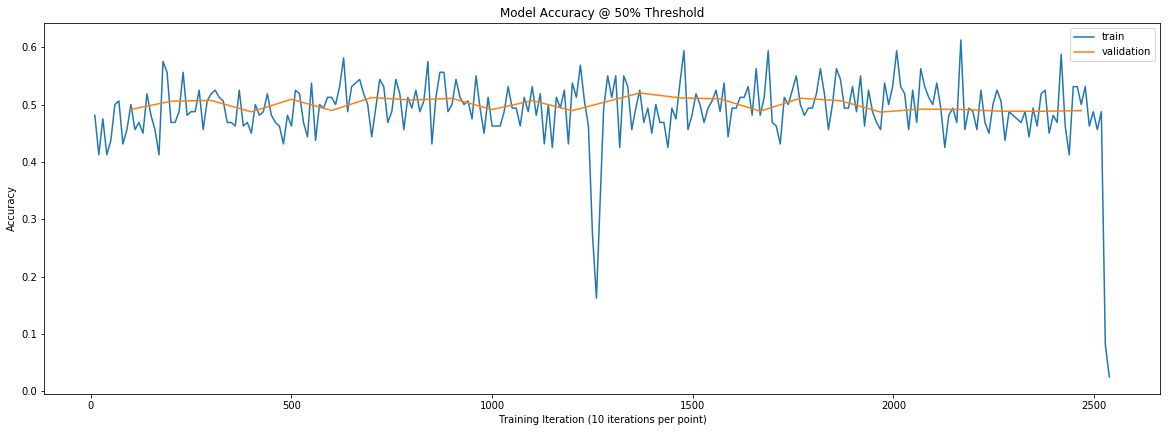

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': True,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.3',
    '--dset-size': '20000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '2',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '5000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '100'}


In [9]:
model_path = 'complete_QNLI-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 909.3701 
Train Time: 485.2601
Max (Validation, Train): (0.57, 0.74)


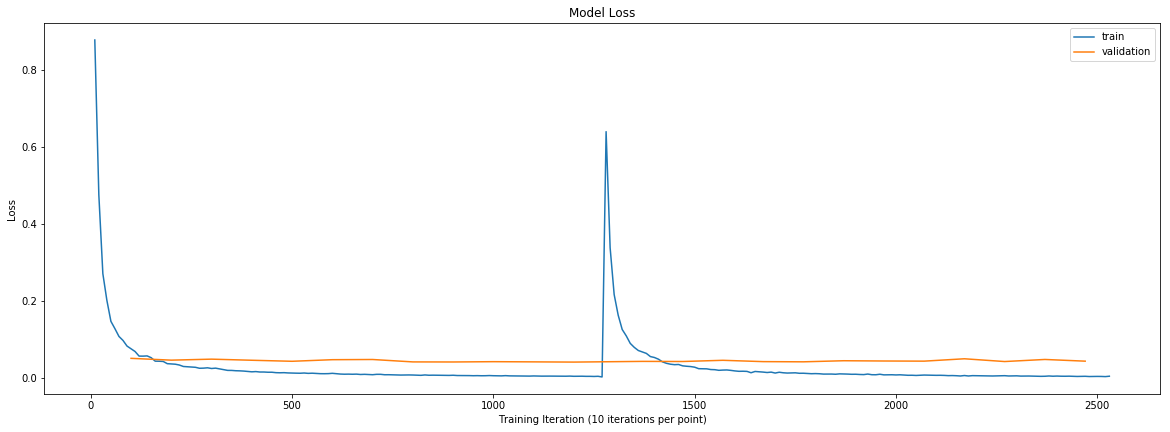

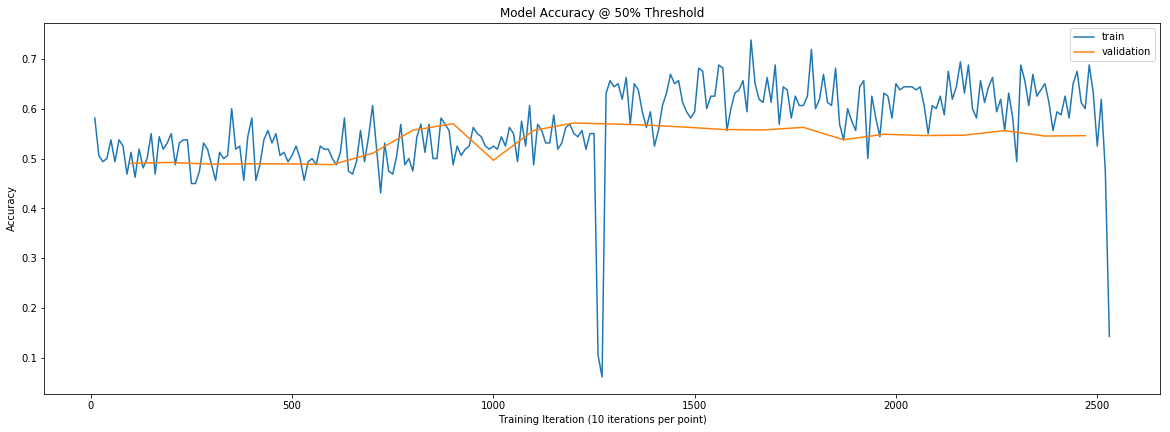

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': True,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.3',
    '--dset-size': '20000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '2',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '5000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '100'}


In [10]:
model_path = 'complete_QNLI-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.52, 0.61)
Total Time: 800.0362 
Train Time: 380.3715
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.57, 0.74)
Total Time: 909.3701 
Train Time: 485.2601


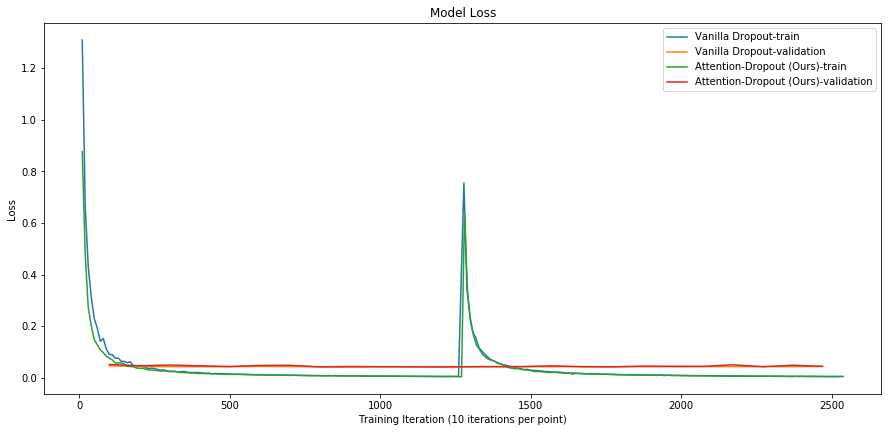

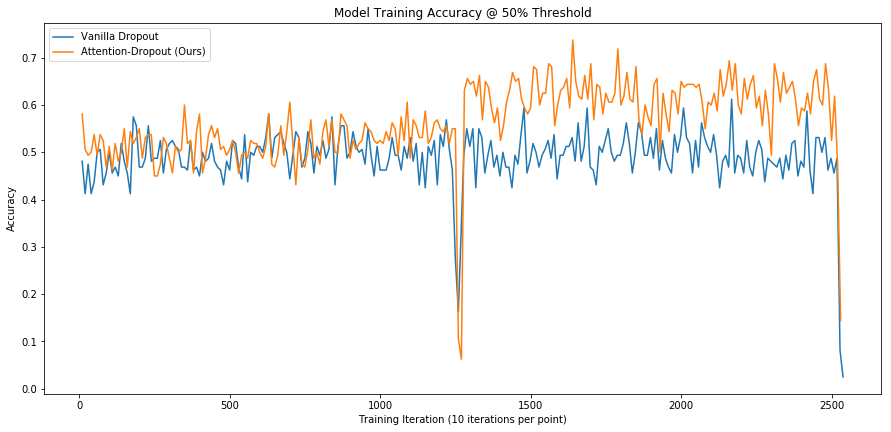

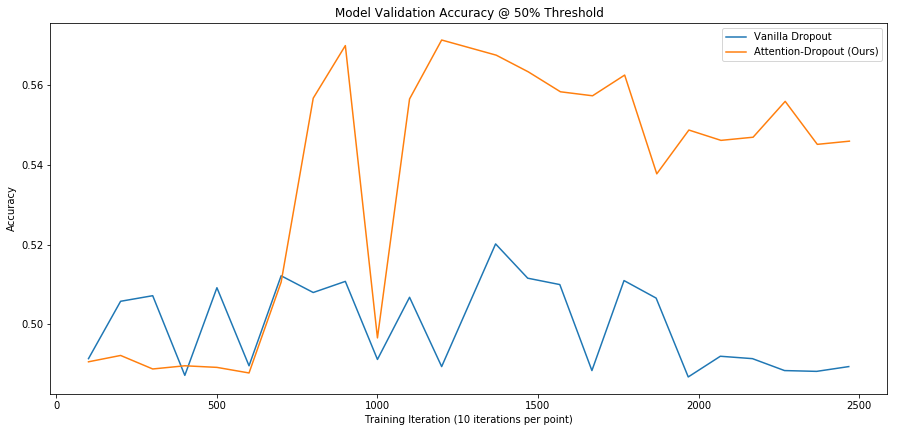

In [11]:
# better accuracy & faster 
compare_metrics([m1, m2], first_n=None)

# QQP

Total Time: 376.8585 
Train Time: 181.3977
Max (Validation, Train): (0.82, 0.89)


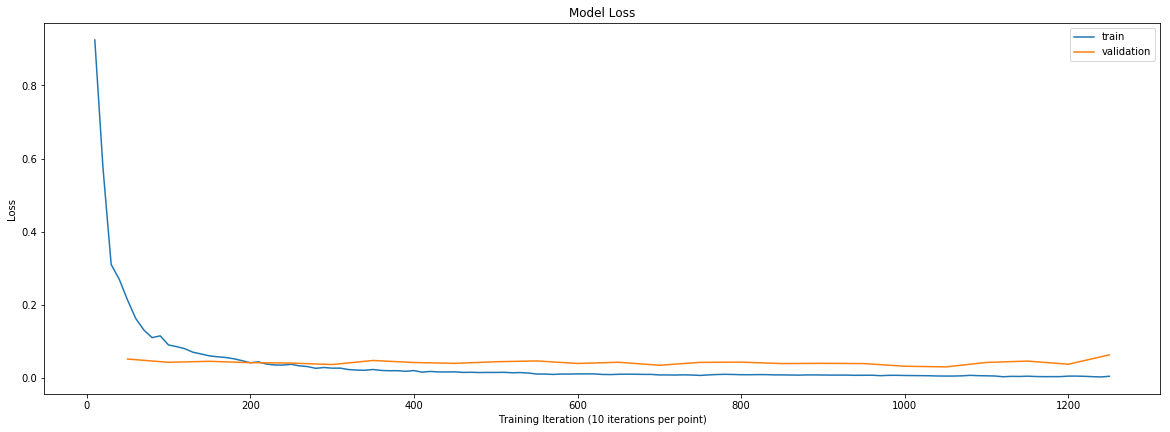

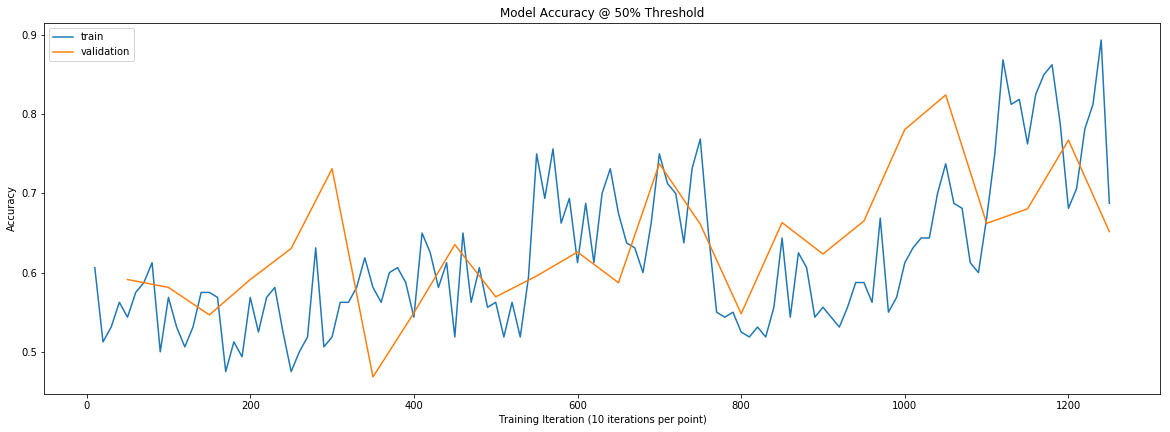

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': True,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.3',
    '--dset-size': '20000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '2000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '50'}


In [18]:
model_path = 'complete_QQP-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 448.3164 
Train Time: 232.1001
Max (Validation, Train): (0.87, 0.91)


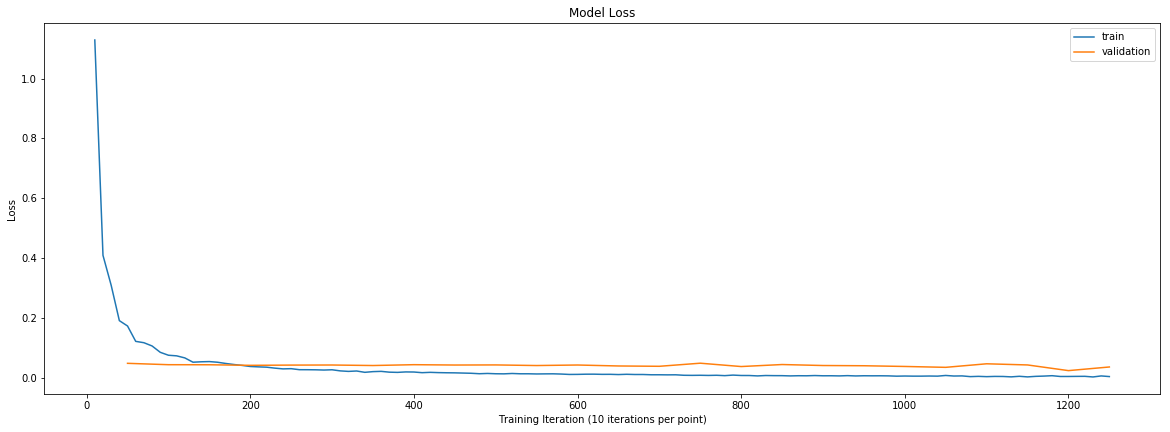

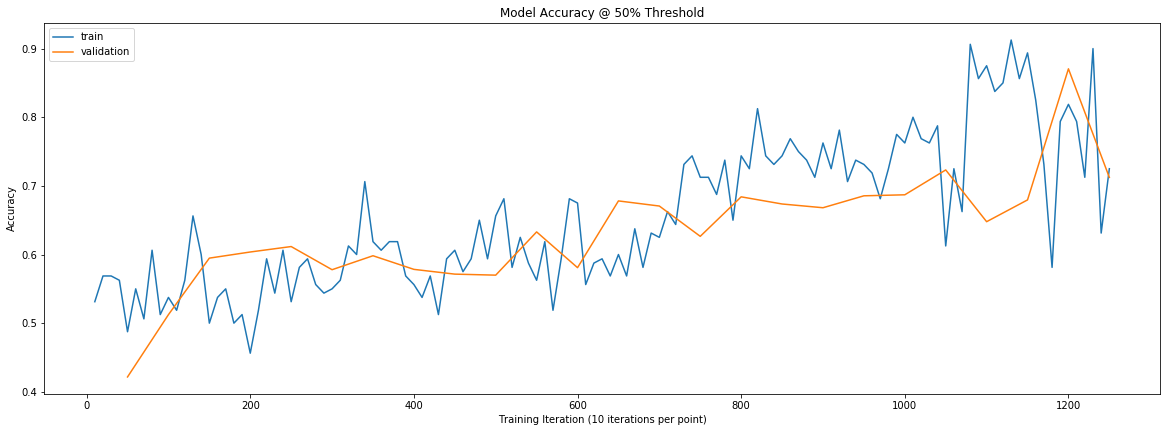

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': True,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.3',
    '--dset-size': '20000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '2000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '50'}


In [19]:
model_path = 'complete_QQP-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.82, 0.89)
Total Time: 376.8585 
Train Time: 181.3977
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.87, 0.91)
Total Time: 448.3164 
Train Time: 232.1001


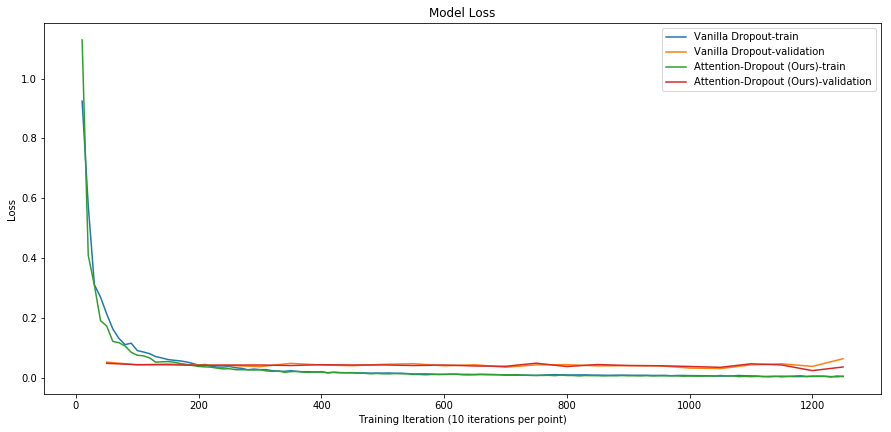

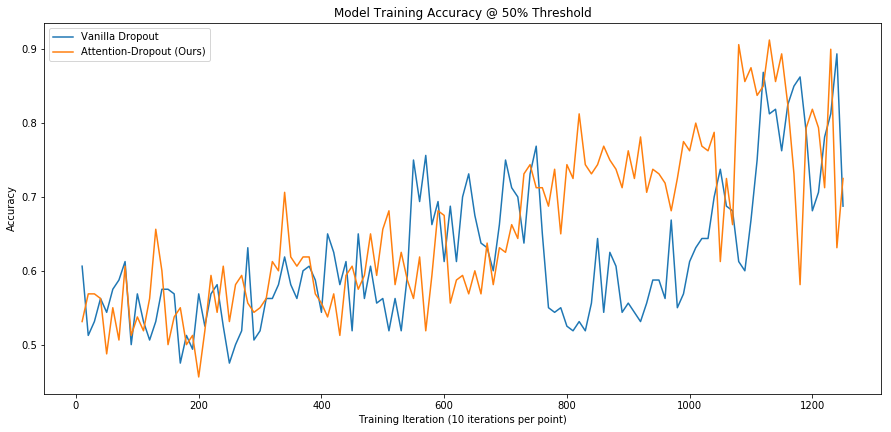

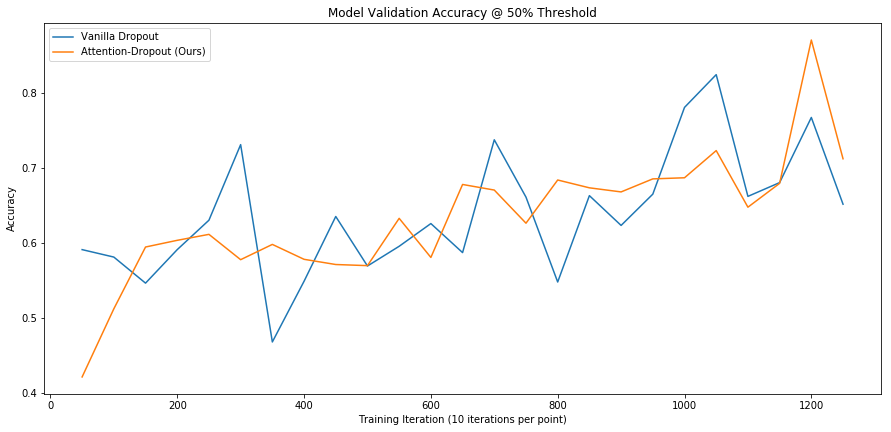

In [20]:
# 5% increase on validation score 
compare_metrics([m1, m2], first_n=None)